In [2]:
import numpy as np 
import random
import matplotlib.pyplot as plt # Graphical library
#from sklearn.metrics import mean_squared_error # Mean-squared error function

# Coursework 1 :
See pdf for instructions. 

In [36]:
# WARNING: fill in these two functions that will be used by the auto-marking script
# [Action required]

def get_CID():
  return "01541013" # Return your CID (add 0 at the beginning to ensure it is 8 digits long)

def get_login():
  return "ss17818" # Return your short imperial login

## Helper class

In [37]:
# This class is used ONLY for graphics
# YOU DO NOT NEED to understand it to work on this coursework

class GraphicsMaze(object):

  def __init__(self, shape, locations, default_reward, obstacle_locs, absorbing_locs, absorbing_rewards, absorbing):

    self.shape = shape
    self.locations = locations
    self.absorbing = absorbing

    # Walls
    self.walls = np.zeros(self.shape)
    for ob in obstacle_locs:
      self.walls[ob] = 20

    # Rewards
    self.rewarders = np.ones(self.shape) * default_reward
    for i, rew in enumerate(absorbing_locs):
      self.rewarders[rew] = 10 if absorbing_rewards[i] > 0 else -10

    # Print the map to show it
    self.paint_maps()

  def paint_maps(self):
    """
    Print the Maze topology (obstacles, absorbing states and rewards)
    input: /
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders)
    plt.show()

  def paint_state(self, state):
    """
    Print one state on the Maze topology (obstacles, absorbing states and rewards)
    input: /
    output: /
    """
    states = np.zeros(self.shape)
    states[state] = 30
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders + states)
    plt.show()

  def draw_deterministic_policy(self, Policy):
    """
    Draw a deterministic policy
    input: Policy {np.array} -- policy to draw (should be an array of values between 0 and 3 (actions))
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders) # Create the graph of the Maze
    for state, action in enumerate(Policy):
      if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any action
        continue
      arrows = [r"$\uparrow$",r"$\rightarrow$", r"$\downarrow$", r"$\leftarrow$"] # List of arrows corresponding to each possible action
      action_arrow = arrows[action] # Take the corresponding action
      location = self.locations[state] # Compute its location on graph
      plt.text(location[1], location[0], action_arrow, ha='center', va='center') # Place it on graph
    plt.show()

  def draw_policy(self, Policy):
    """
    Draw a policy (draw an arrow in the most probable direction)
    input: Policy {np.array} -- policy to draw as probability
    output: /
    """
    deterministic_policy = np.array([np.argmax(Policy[row,:]) for row in range(Policy.shape[0])])
    self.draw_deterministic_policy(deterministic_policy)

  def draw_value(self, Value):
    """
    Draw a policy value
    input: Value {np.array} -- policy values to draw
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders) # Create the graph of the Maze
    for state, value in enumerate(Value):
      if(self.absorbing[0, state]): # If it is an absorbing state, don't plot any value
        continue
      location = self.locations[state] # Compute the value location on graph
      plt.text(location[1], location[0], round(value,2), ha='center', va='center') # Place it on graph
    plt.show()

  def draw_deterministic_policy_grid(self, Policies, title, n_columns, n_lines):
    """
    Draw a grid representing multiple deterministic policies
    input: Policies {np.array of np.array} -- array of policies to draw (each should be an array of values between 0 and 3 (actions))
    output: /
    """
    plt.figure(figsize=(20,8))
    for subplot in range (len(Policies)): # Go through all policies
      ax = plt.subplot(n_columns, n_lines, subplot+1) # Create a subplot for each policy
      ax.imshow(self.walls+self.rewarders) # Create the graph of the Maze
      for state, action in enumerate(Policies[subplot]):
        if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any action
          continue
        arrows = [r"$\uparrow$",r"$\rightarrow$", r"$\downarrow$", r"$\leftarrow$"] # List of arrows corresponding to each possible action
        action_arrow = arrows[action] # Take the corresponding action
        location = self.locations[state] # Compute its location on graph
        plt.text(location[1], location[0], action_arrow, ha='center', va='center') # Place it on graph
      ax.title.set_text(title[subplot]) # Set the title for the graph given as argument
    plt.show()

  def draw_policy_grid(self, Policies, title, n_columns, n_lines):
    """
    Draw a grid representing multiple policies (draw an arrow in the most probable direction)
    input: Policy {np.array} -- array of policies to draw as probability
    output: /
    """
    deterministic_policies = np.array([[np.argmax(Policy[row,:]) for row in range(Policy.shape[0])] for Policy in Policies])
    self.draw_deterministic_policy_grid(deterministic_policies, title, n_columns, n_lines)

  def draw_value_grid(self, Values, title, n_columns, n_lines):
    """
    Draw a grid representing multiple policy values
    input: Values {np.array of np.array} -- array of policy values to draw
    output: /
    """
    plt.figure(figsize=(20,8))
    for subplot in range (len(Values)): # Go through all values
      ax = plt.subplot(n_columns, n_lines, subplot+1) # Create a subplot for each value
      ax.imshow(self.walls+self.rewarders) # Create the graph of the Maze
      for state, value in enumerate(Values[subplot]):
        if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any value
          continue
        location = self.locations[state] # Compute the value location on graph
        plt.text(location[1], location[0], round(value,1), ha='center', va='center') # Place it on graph
      ax.title.set_text(title[subplot]) # Set the title for the graoh given as argument
    plt.show()



## Maze class

In [38]:
# This class define the Maze environment

class Maze(object):

  # [Action required]
  def __init__(self):
    """
    Maze initialisation.
    input: /
    output: /
    """
    
    # [Action required]
    # Properties set from the CID
    self._prob_success = 0.96 # 0.8 + 0.02 * (9 - get_CID()[6]) # float
    self._gamma = 0.82 #0.8 + 0.02 * get_CID()[6] # float
    self._goal = 3 #get_CID()[7] & 4 # integer (0 for R0, 1 for R1, 2 for R2, 3 for R3)

    # Build the maze
    self._build_maze()
                              

  # Functions used to build the Maze environment 
  # You DO NOT NEED to modify them
  def _build_maze(self):
    """
    Maze initialisation.
    input: /
    output: /
    """

    # Properties of the maze
    self._shape = (13, 10)
    self._obstacle_locs = [
                          (1,0), (1,1), (1,2), (1,3), (1,4), (1,7), (1,8), (1,9), \
                          (2,1), (2,2), (2,3), (2,7), \
                          (3,1), (3,2), (3,3), (3,7), \
                          (4,1), (4,7), \
                          (5,1), (5,7), \
                          (6,5), (6,6), (6,7), \
                          (8,0), \
                          (9,0), (9,1), (9,2), (9,6), (9,7), (9,8), (9,9), \
                          (10,0)
                         ] # Location of obstacles
    self._absorbing_locs = [(2,0), (2,9), (10,1), (12,9)] # Location of absorbing states
    self._absorbing_rewards = [ (500 if (i == self._goal) else -50) for i in range (4) ]
    self._starting_locs = [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9)] #Reward of absorbing states
    self._default_reward = -1 # Reward for each action performs in the environment
    self._max_t = 500 # Max number of steps in the environment

    # Actions
    self._action_size = 4
    self._direction_names = ['N','E','S','W'] # Direction 0 is 'N', 1 is 'E' and so on
        
    # States
    self._locations = []
    for i in range (self._shape[0]):
      for j in range (self._shape[1]):
        loc = (i,j) 
        # Adding the state to locations if it is no obstacle
        if self._is_location(loc):
          self._locations.append(loc)
    self._state_size = len(self._locations)

    # Neighbours - each line is a state, ranked by state-number, each column is a direction (N, E, S, W)
    self._neighbours = np.zeros((self._state_size, 4)) 
    
    for state in range(self._state_size):
      loc = self._get_loc_from_state(state)

      # North
      neighbour = (loc[0]-1, loc[1]) # North neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('N')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('N')] = state

      # East
      neighbour = (loc[0], loc[1]+1) # East neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('E')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('E')] = state

      # South
      neighbour = (loc[0]+1, loc[1]) # South neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('S')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('S')] = state

      # West
      neighbour = (loc[0], loc[1]-1) # West neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('W')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('W')] = state

    # Absorbing
    self._absorbing = np.zeros((1, self._state_size))
    for a in self._absorbing_locs:
      absorbing_state = self._get_state_from_loc(a)
      self._absorbing[0, absorbing_state] = 1

    # Transition matrix
    self._T = np.zeros((self._state_size, self._state_size, self._action_size)) # Empty matrix of domension S*S*A
    for action in range(self._action_size):
      for outcome in range(4): # For each direction (N, E, S, W)
        # The agent has prob_success probability to go in the correct direction
        if action == outcome:
          prob = 1 - 3.0 * ((1.0 - self._prob_success) / 3.0) # (theoritically equal to self.prob_success but avoid rounding error and garanty a sum of 1)
        # Equal probability to go into one of the other directions
        else:
          prob = (1.0 - self._prob_success) / 3.0
          
        # Write this probability in the transition matrix
        for prior_state in range(self._state_size):
          # If absorbing state, probability of 0 to go to any other states
          if not self._absorbing[0, prior_state]:
            post_state = self._neighbours[prior_state, outcome] # Post state number
            post_state = int(post_state) # Transform in integer to avoid error
            self._T[prior_state, post_state, action] += prob

    # Reward matrix
    self._R = np.ones((self._state_size, self._state_size, self._action_size)) # Matrix filled with 1
    self._R = self._default_reward * self._R # Set default_reward everywhere
    for i in range(len(self._absorbing_rewards)): # Set absorbing states rewards
      post_state = self._get_state_from_loc(self._absorbing_locs[i])
      self._R[:,post_state,:] = self._absorbing_rewards[i]

    # Creating the graphical Maze world
    self._graphics = GraphicsMaze(self._shape, self._locations, self._default_reward, self._obstacle_locs, self._absorbing_locs, self._absorbing_rewards, self._absorbing)
    
    # Reset the environment
    self.reset()


  def _is_location(self, loc):
    """
    Is the location a valid state (not out of Maze and not an obstacle)
    input: loc {tuple} -- location of the state
    output: _ {bool} -- is the location a valid state
    """
    if (loc[0] < 0 or loc[1] < 0 or loc[0] > self._shape[0]-1 or loc[1] > self._shape[1]-1):
      return False
    elif (loc in self._obstacle_locs):
      return False
    else:
      return True


  def _get_state_from_loc(self, loc):
    """
    Get the state number corresponding to a given location
    input: loc {tuple} -- location of the state
    output: index {int} -- corresponding state number
    """
    return self._locations.index(tuple(loc))


  def _get_loc_from_state(self, state):
    """
    Get the state number corresponding to a given location
    input: index {int} -- state number
    output: loc {tuple} -- corresponding location
    """
    return self._locations[state]

  # Getter functions used only for DP agents
  # You DO NOT NEED to modify them
  def get_T(self):
    return self._T

  def get_R(self):
    return self._R

  def get_absorbing(self):
    return self._absorbing

  # Getter functions used for DP, MC and TD agents
  # You DO NOT NEED to modify them
  def get_graphics(self):
    return self._graphics

  def get_action_size(self):
    return self._action_size

  def get_state_size(self):
    return self._state_size

  def get_gamma(self):
    return self._gamma

  # Functions used to perform episodes in the Maze environment
  def reset(self):
    """
    Reset the environment state to one of the possible starting states
    input: /
    output: 
      - t {int} -- current timestep
      - state {int} -- current state of the envionment
      - reward {int} -- current reward
      - done {bool} -- True if reach a terminal state / 0 otherwise
    """
    self._t = 0
    self._state = self._get_state_from_loc(self._starting_locs[random.randrange(len(self._starting_locs))])
    self._reward = 0
    self._done = False
    return self._t, self._state, self._reward, self._done

  def step(self, action):
    """
    Perform an action in the environment
    input: action {int} -- action to perform
    output: 
      - t {int} -- current timestep
      - state {int} -- current state of the envionment
      - reward {int} -- current reward
      - done {bool} -- True if reach a terminal state / 0 otherwise
    """

    # If environment already finished, print an error
    if self._done or self._absorbing[0, self._state]:
      print("Please reset the environment")
      return self._t, self._state, self._reward, self._done

    # Drawing a random number used for probaility of next state
    probability_success = random.uniform(0,1)

    # Look for the first possible next states (so get a reachable state even if probability_success = 0)
    new_state = 0
    while self._T[self._state, new_state, action] == 0: 
      new_state += 1
    assert self._T[self._state, new_state, action] != 0, "Selected initial state should be probability 0, something might be wrong in the environment."

    # Find the first state for which probability of occurence matches the random value
    total_probability = self._T[self._state, new_state, action]
    while (total_probability < probability_success) and (new_state < self._state_size-1):
     new_state += 1
     total_probability += self._T[self._state, new_state, action]
    assert self._T[self._state, new_state, action] != 0, "Selected state should be probability 0, something might be wrong in the environment."
    
    # Setting new t, state, reward and done
    self._t += 1
    self._reward = self._R[self._state, new_state, action]
    self._done = self._absorbing[0, new_state] or self._t > self._max_t
    self._state = new_state
    return self._t, self._state, self._reward, self._done

## DP Agent

In [93]:
# This class define the Dynamic Programing agent 

class DP_agent(object):

  # [Action required]
  # WARNING: make sure this function can be called by the auto-marking script
  def solve(self, env):
    """
    Solve a given Maze environment using Dynamic Programming
    input: env {Maze object} -- Maze to solve
    output: 
      - policy {np.array} -- Optimal policy found to solve the given Maze environment 
      - V {np.array} -- Corresponding value function 
    """

    # Initialisation (can be edited)
    policy = np.zeros((env.get_state_size(), env.get_action_size())) 
    V = np.zeros(env.get_state_size())

    #### 
    # Add your code here
    # WARNING: for this agent only, you are allowed to access env.get_T(), env.get_R() and env.get_absorbing()
    ####
    threshold = 1
    delta = threshold
    v=[]

    epochs = 0
    while delta >= threshold:
      print("epoch ", epochs)
      delta = 0
      for prior_state in range(env.get_state_size()):
        if not env.get_absorbing()[0,prior_state]:
          v = V[prior_state]    #storing previous state value

          Q = np.zeros(env.get_action_size())   # intialise Q value
          for post_state in range(env.get_state_size()):
  
            Q += env.get_T()[prior_state, post_state, :] * (env.get_R()[prior_state, post_state, :] + env.get_gamma() * V[post_state])
            
            V[prior_state] = np.max(Q)   #setting max Q to state value
            delta = max(delta, (V[prior_state] - v))
          # print(np.argmax(Q))
          policy[prior_state, :] = 0
          policy[prior_state, np.argmax(Q)] = 1
      epochs += 1

    for prior_state in range(env.get_state_size()):   #to fill in optimal policy
      Q = np.zeros(env.get_action_size())
      for post_state in range(env.get_state_size()):
        # Q += env.get_T()[prior_state, post_state, :] * (env.get_R()[prior_state, post_state, :] + env.get_gamma() * V[post_state])
        Q += env.get_T()[prior_state, post_state, :] * (env.get_R()[prior_state, post_state, :] + env.get_gamma() * V[post_state])

    return policy, V

## MC agent

In [75]:
# This class define the Monte-Carlo agent

class MC_agent(object):
  # def get_action(self, epsilon, Q):
  #   num = np.random.rand(0,1)
  #   if num < epsilon:
  #     action = np.random.choice(env.get_action_size)
  #   else:
  #     action = np.argmax(Q)
  #   return action

  def solve(self, env):
    """
    Solve a given Maze environment using Monte Carlo learning
    input: env {Maze object} -- Maze to solve
    output: 
      - policy {np.array} -- Optimal policy found to solve the given Maze environment 
      - values {list of np.array} -- List of successive value functions for each episode 
      - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode 
    """

    # Initialisation
    num_episodes = 500
    Q = np.random.rand(env.get_state_size(), env.get_action_size()) 
    V = np.zeros((num_episodes, env.get_state_size()))
    visit = np.zeros(env.get_state_size())
    policy = np.zeros((env.get_state_size(), env.get_action_size())) 
    total_rewards = np.zeros(num_episodes)

    alpha = 0.1
    epsilon = 1
    eps_decay = 0.99


    for state in range(env.get_state_size()):
      for action in range(env.get_action_size()):
        if action == np.argmax(Q[state,:]):  #greedy action
          policy[state,action] = 1 - epsilon + epsilon/env.get_action_size()
        else:
          policy[state,action] = epsilon/env.get_action_size()

    for state in range(env.get_state_size()):
      rand_action = np.random.random(4)
      rand_action /= rand_action.sum()
      policy[state,:] = rand_action     #creating random action for episode generation below

    for ii in range(num_episodes):      #creating episode here
      
      t, state, reward, done = env.reset()
      print("episode number = ", ii)
      print("epsilon = ", epsilon)
      # print(Q)
      results_list = []
      action_list = []
      state_list = []
      reward_list = []
      G = []
      
      while not done:
        if np.random.rand() > epsilon:
          action = np.argmax(Q[state,:])
        else:
          # action = np.random.choice(4)
          action = np.random.choice(env.get_action_size(),1,p=policy[state,:])

        t, new_state, reward, done = env.step(action)
        results_list.append((state, action))
        reward_list.append(reward)
        state = new_state
      
      G_temp = np.zeros((env.get_state_size(),env.get_action_size()))
      for (state, action) in results_list:
        if G_temp[state,action]==0:
          G_temp[state,action] = 1
          G = sum(r * (env.get_gamma()**j) for j,r in enumerate(reward_list[state:]))
          Q[state, action] += alpha * (G - Q[state, action])
          total_rewards[ii] += reward

          for state in range(env.get_state_size):
            V[ii,state] = np.max(Q[state,:])

      for (state, _) in results_list:
        greedy_action = np.argmax(Q[state,:])
        greedy_val = np.max(Q[state,:])
        for action in range(env.get_action_size()):
          if action == np.argmax(Q[state,:]):  #greedy action
            policy[state,action] = 1 - epsilon + epsilon/env.get_action_size()
          else:
            policy[state,action] = epsilon/env.get_action_size()

          # if greedy_action.size > 1:
          #   greedy_action = 1 - random.choice(greedy_action)
          #   V[ii,state] = random.choice(greedy_val)
          # else:
          #   V[ii,state] = greedy_val

        
      

      # # optimal policy calculated below
      # best_policy = np.zeros((env.get_state_size(),env.get_action_size()))
      # for state in range(env.get_state_size()):
      #   best_policy[state, np.argmax(Q[state,:])] = 1       #action that maximises Q is given prob 1
          
    epsilon *= eps_decay

    return policy, V, total_rewards, visit


In [80]:
 # MC FINAL ATTEMPT - USE THIS CODE
 
 class MC_agent(object):
  
  # def get_action(self, epsilon, Q):
  #   num = np.random.rand(0,1)
  #   if num < epsilon:
  #     action = np.random.choice(env.get_action_size)
  #   else:
  #     action = np.argmax(Q)
  #   return action

  def solve(self, env):
    
    num_episodes = 1000
    epsilon = 1
    eps_decay = 0.999
    alpha= 0.05

    Q = np.random.rand(env.get_state_size(), env.get_action_size()) 
    V = np.zeros((num_episodes, env.get_state_size()))
    visit = np.zeros(env.get_state_size())

    policy = np.zeros((env.get_state_size(), env.get_action_size())) 
    values = np.zeros((num_episodes, env.get_state_size()))
    total_rewards = np.zeros(num_episodes)

    for state in range(env.get_state_size()):
      rand_action = np.random.random(4)
      rand_action /= rand_action.sum()
      policy[state,:] = rand_action

    for ii in range(num_episodes):
      # print("episode ", ii, ", e = ", epsilon)
      t, state, reward, done = env.reset()

      action_list = []
      state_list = []
      reward_list = []
      G = []
      
      # generating an episode 
      while not done:
        dist_actions = policy[state,:]
        a = np.random.choice(env.get_action_size(),1,p=dist_actions)
        # a = self.get_action(epsilon, Q)

        visit[state] += 1
      
        state_list.append(state)
        action_list.append(a)
        t, state, reward, done = env.step(a)
        reward_list.append(reward)
        total_rewards[ii] += reward
        
    # compute Q for a generated episode, im using on policy e greedy
      G_temp = np.zeros((env.get_state_size(),env.get_action_size()))

      for s, _ in enumerate(state_list):
        ps = state_list[s]
        pa = action_list[s]

        if G_temp[ps,pa]==0:
          G_temp[ps,pa] = 1
          G = sum(r*(env.get_gamma()**j) for j,r in enumerate(reward_list[s:]))
          Q[ps,pa] += alpha*(G-Q[ps,pa])

        #state value for greedy action
        for state in range(env.get_state_size()):
          V[ii,state] = np.max(Q[state,:])

      # choose next action by being greedy

      for state in range(env.get_state_size()):
      #   best_action = np.argmax(Q[state,:])
        # if best_action.size > 1:
        #   best_action = 1 - random.choice(best_action)
        #   V[ii,state] = random.choice(np.max(Q[state,:])
        # else:
        #   V[ii,state] = np.max(Q[state,:])

        # epsilon greedy used to assign policy, mitigates for exploitation-exploration trade off
        for action in range(env.get_action_size()):
          if action == np.argmax(Q[state,:]):
            policy[state,action] = 1 - epsilon + epsilon/env.get_action_size()
          else:
            policy[state,action] = epsilon/env.get_action_size()

              
          choose_action = np.ones(env.get_action_size(),dtype=float) * [epsilon/env.get_action_size()]
          choose_action[np.argmax(Q[state,:])] += 1 - epsilon
          policy[state,:] = choose_action


        # optimal policy calculated below
        best_policy = np.zeros((env.get_state_size(),env.get_action_size()))
        for state in range(env.get_state_size()):
          best_policy[state, np.argmax(policy[state,:])] = 1 

      epsilon *= eps_decay

    return best_policy, V, total_rewards, visit
  

## TD agent

In [34]:
# This class define the Temporal-Difference agent

class TD_agent(object):

  def solve(self, env):

    num_episodes = 1000
    epsilon = 0.5
    # eps_decay = 0.99
    alpha=0.1
    
    Q = np.random.rand(env.get_state_size(), env.get_action_size())
    V = np.zeros((num_episodes, env.get_state_size()))
    visit = np.zeros(env.get_state_size())
    policy = np.zeros((env.get_state_size(), env.get_action_size())) 
    # values = np.zeros((num_episodes, env.get_state_size()))
    total_rewards = np.zeros(num_episodes)

    for state in range(env.get_state_size()):
      rand_action = np.random.random(4)
      rand_action /= rand_action.sum()
      policy[state,:] = rand_action

    for ii in range(num_episodes):
      t, state, reward, done = env.reset()
      # print("episode number = ", ii)
      # print("epsilon = ", epsilon)

      action_list = []
      state_list = []
      reward_list = []
      G = []
      
      # generating an episode 
      while not done:
        dist_actions = policy[state,:]
        action = np.random.choice(env.get_action_size(),1,p=dist_actions)
        
        state_list.append(state)
        action_list.append(action)
        reward_list.append(reward)
        next_t, next_state, next_reward, done = env.step(action)
           
        # compute Q for a generated episode
        Q[state,action] = Q[state,action] + alpha * (next_reward + env.get_gamma()*(max(Q[next_state,:]) - Q[state,action])) ###this line is giving me an error change this loop
        state = next_state
        total_rewards[ii] += next_reward
        visit[state] += 1

      #state value for greedy action
      for state in range(env.get_state_size()):
        V[ii,state] = np.max(Q[state,:])
        # values[ii,:] = V

      for state in range(env.get_state_size()):
        greedy_action = np.argmax(Q[state,:])
        opt_val = np.max(Q[state,:])
        if greedy_action.size > 1:
          greedy_action = 1 - random.choice(greedy_action)
          V[ii,state] = random.choice(opt_val)
        else:
          V[ii,state] = opt_val

      # epsilon *= eps_decay
      
      choose_action = np.ones(env.get_action_size(),dtype=float) * [epsilon/env.get_action_size()]
      choose_action[greedy_action] += 1 - epsilon
      policy[state,:] = choose_action

      # choose best policy after updates
      best_policy = np.zeros((env.get_state_size(),env.get_action_size()))
      for state in range(env.get_state_size()):
        best_policy[state, np.argmax(policy[state,:])] = 1 

    return best_policy, V, total_rewards

## Example main

Creating the Maze:



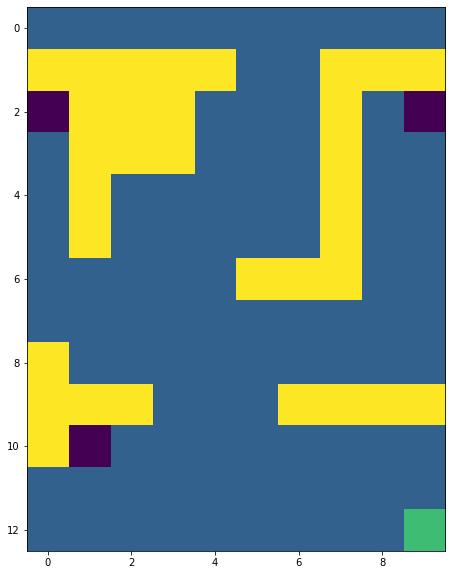

NameError: ignored

In [245]:
# Example main (can be edited)

### Question 0: Defining the environment

print("Creating the Maze:\n")
maze = Maze()


### Question 1: Dynamic programming

dp_agent = DP_agent()
dp_policy, dp_value = dp_agent.solve(maze)

print("Results of the DP agent:\n")
maze.get_graphics().draw_policy(dp_policy)
maze.get_graphics().draw_value(dp_value)


### Question 2: Monte-Carlo learning

mc_agent = MC_agent()
mc_policy, mc_values, total_rewards,visits = mc_agent.solve(maze)

print("Results of the MC agent:\n")
maze.get_graphics().draw_policy(mc_policy)
maze.get_graphics().draw_value(mc_values[-1])


### Question 3: Temporal-Difference learning

td_agent = TD_agent()
td_policy, td_values, total_rewards = td_agent.solve(maze)

print("Results of the TD agent:\n")
maze.get_graphics().draw_policy(td_policy)
maze.get_graphics().draw_value(td_values[-1])

# Testing my code for Q1,2,3

In [ ]:
### Question 1: Dynamic programming

maze = Maze()
dp_agent = DP_agent()
# dp_policy, dp_value = dp_agent.solve(maze)

gamma_range = [0.3, 0.8]
prob_range = [0.3, 0.5, 0.8]
epochs = 0

# print("Results of the DP agent:\n")
# maze.get_graphics().draw_policy(dp_policy)
# maze.get_graphics().draw_value(dp_value)

# for different gamma values
plt.figure(figsize=(10,6))
for g in gamma_range:
  print(g)
  maze._gamma = g
  dp_policy, dp_value = dp_agent.solve(maze)
  print("Results of the DP agent with gamma: ", g, "\n")
  maze.get_graphics().draw_policy(dp_policy)
  maze.get_graphics().draw_value(dp_value)
  epochs = len(dp_policy)
  plt.plot(g, epochs, 'bo')

plt.xlabel("Probability of Success")
plt.ylabel("Number of epochs")
plt.title("Impact of probability of success on the number of epochs needed for the value iteration algorithm:\n")
plt.show()

# plt.figure(figsize=(10,6))

# for p in prob_range:
#   maze._prob_success = p
#   dp_policy, dp_value = dp_agent.solve(maze)
#   print("Results of the DP agent with probability: ", p, "\n")
#   maze.get_graphics().draw_policy(dp_policy)
#   maze.get_graphics().draw_value(dp_value)
#   epochs = len(dp_policy)
#   plt.plot(p, epochs, 'bo')             # Plot the number of epochs vs prob values

# plt.xlabel("Probability of Success")
# plt.ylabel("Number of epochs")
# plt.title("Impact of probability of success on the number of epochs needed for the value iteration algorithm:\n")
# plt.legend()
# plt.show()



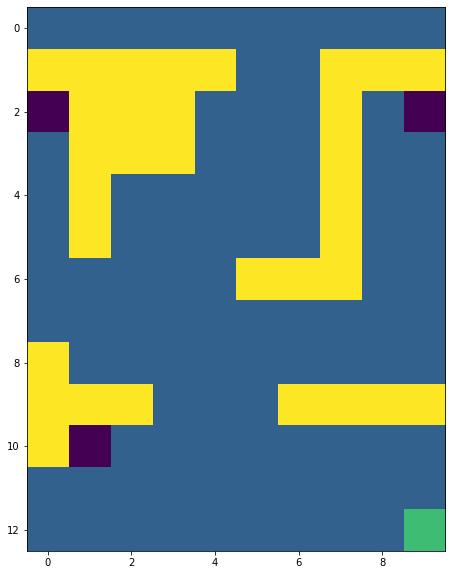

Results of the MC agent:



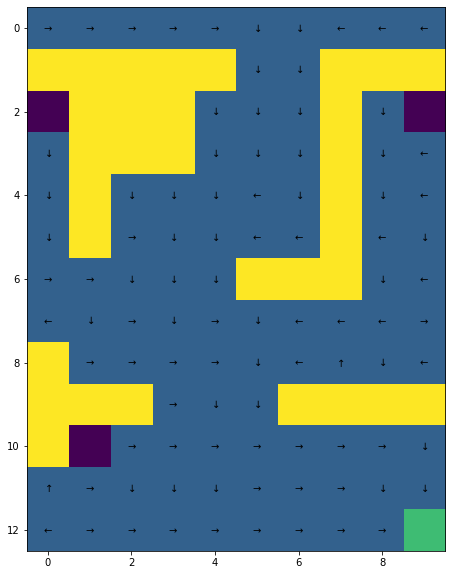

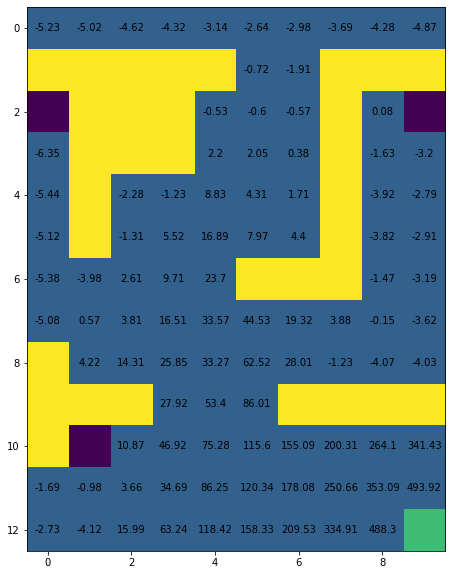

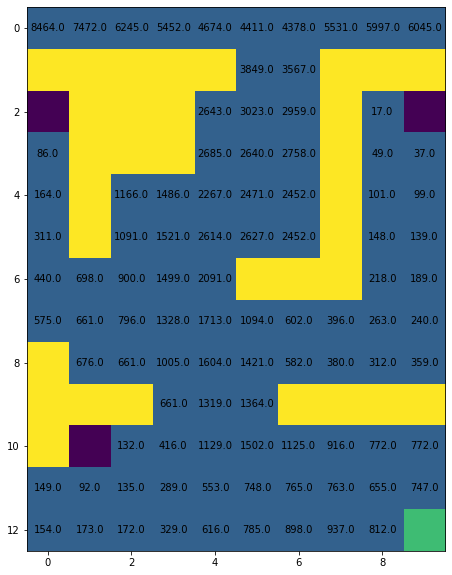

Replication number: 1


In [ ]:
### Question 2: Monte-Carlo learning

maze = Maze()
mc_agent = MC_agent()

difference = []
max_diff = []
mean_squared = []
std_rewards = []
mean_rewards = []
replications = 20
std = 0

mc_policy, mc_values, total_rewards, visit = mc_agent.solve(maze)

print("Results of the MC agent:\n")
maze.get_graphics().draw_policy(mc_policy)
maze.get_graphics().draw_value(mc_values[-1])
maze.get_graphics().draw_value(visit)

mean_rewards.append(total_rewards)
difference.append(0)
mean_squared.append(total_rewards**2)
std_rewards.append(0)
j=0
for j in range(replications):
  print("Replication number:", j+1)
  mc_policy, mc_values, total_rewards, visit = mc_agent.solve(maze)

  mean_rewards.append(mean_rewards[j-1] + (total_rewards - mean_rewards[j-1])/(j+1))
  difference.append(max(mean_rewards[j] - mean_rewards[j-1]))

  mean_squared.append(mean_squared[j-1] + (total_rewards**2 - mean_squared[j-1])/(j+1))
  std = np.sqrt(mean_squared[j] - mean_rewards[j]**2)
  std_rewards.append(std)

# To determine a sufficient replication number  
plt.figure(figsize=(20,12))
plt.plot(difference)
plt.title('Maximum difference of mean of episodes')
plt.xlabel('Number of Replications')
plt.ylabel('Maximum difference of Mean of Total Rewards of each Episode')
plt.show()

# Learning Curve for MC
plt.figure(figsize=(20,12))
plt.plot(mean_rewards[19][:], color='red')
plt.fill(std_rewards[19][:],color='yellow')
plt.title('Learning Curve for MC algorithm')
plt.xlabel('Number of Replications')
plt.ylabel('Maximum difference of Mean of Total Rewards of each Episode')
plt.legend('Mean','Standard Deviation')
plt.show()

In [82]:
total_rewards.shape


(1000,)

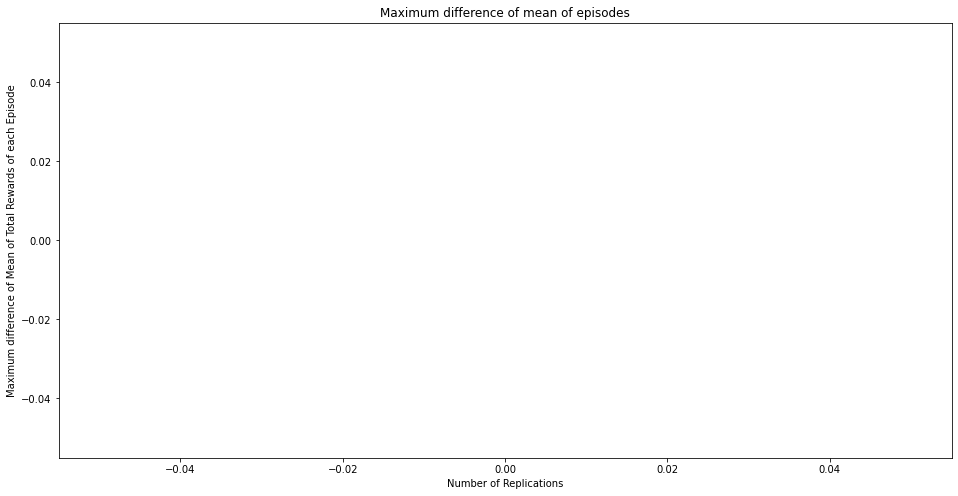

IndexError: ignored

<Figure size 1440x864 with 0 Axes>

In [40]:
# To determine a sufficient replication number  
plt.figure(figsize=(16,8))
# max_diff = np.max(difference[1][:])
plt.plot(difference)
plt.title('Maximum difference of mean of episodes')
plt.xlabel('Number of Replications')
plt.ylabel('Maximum difference of Mean of Total Rewards of each Episode')
plt.show()

# Learning Curve for MC
plt.figure(figsize=(20,12))
plt.plot(mean_rewards[15][:], color='red')
plt.fill(std_rewards[15][:],color='yellow')
plt.title('Learning Curve for MC algorithm')
plt.xlabel('Number of Replications')
plt.ylabel('Maximum difference of Mean of Total Rewards of each Episode')
plt.legend('Mean','Standard Deviation')
plt.show()


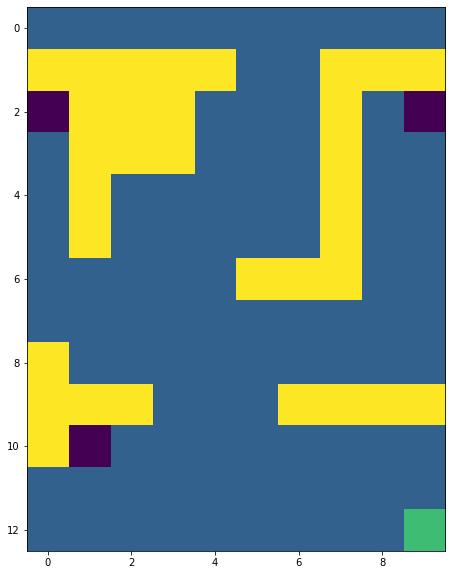

Results of the TD agent:



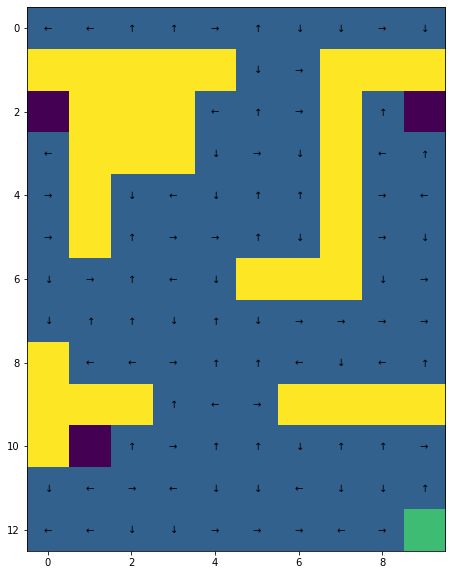

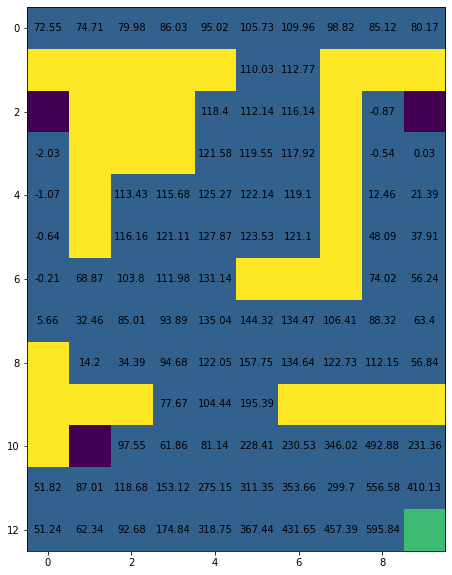

In [35]:
## Question 3: Temporal-Difference learning
maze = Maze()
td_agent = TD_agent()

difference = []
max_diff = []
mean_squared = []
std_rewards = []
mean_rewards = []
replications = 16
std = 0

td_policy, td_values, total_rewards = td_agent.solve(maze)

print("Results of the TD agent:\n")
maze.get_graphics().draw_policy(td_policy)
maze.get_graphics().draw_value(td_values[-1])

# mean_rewards.append(total_rewards)
# mean_squared.append(total_rewards**2)
# std_rewards.append(0)
# difference.append(0)

# for j in range(1,replications):
#   print("Replication number:", j+1)
#   td_policy, td_values, total_rewards = td_agent.solve(maze)

#   mean_rewards.append(mean_rewards[j-1] + (total_rewards - mean_rewards[j-1])/(j+1))
#   difference.append(max(mean_rewards[j] - mean_rewards[j-1]))
#   # max_diff.append(max([difference]))

#   mean_squared.append(mean_squared[j-1] + (total_rewards**2 - mean_squared[j-1])/(j+1))
#   std = np.sqrt(mean_squared[j] - mean_rewards[j-1]**2)
#   std_rewards.append(std)



# learning curve
# non discounted sum of reward against no of epochs 


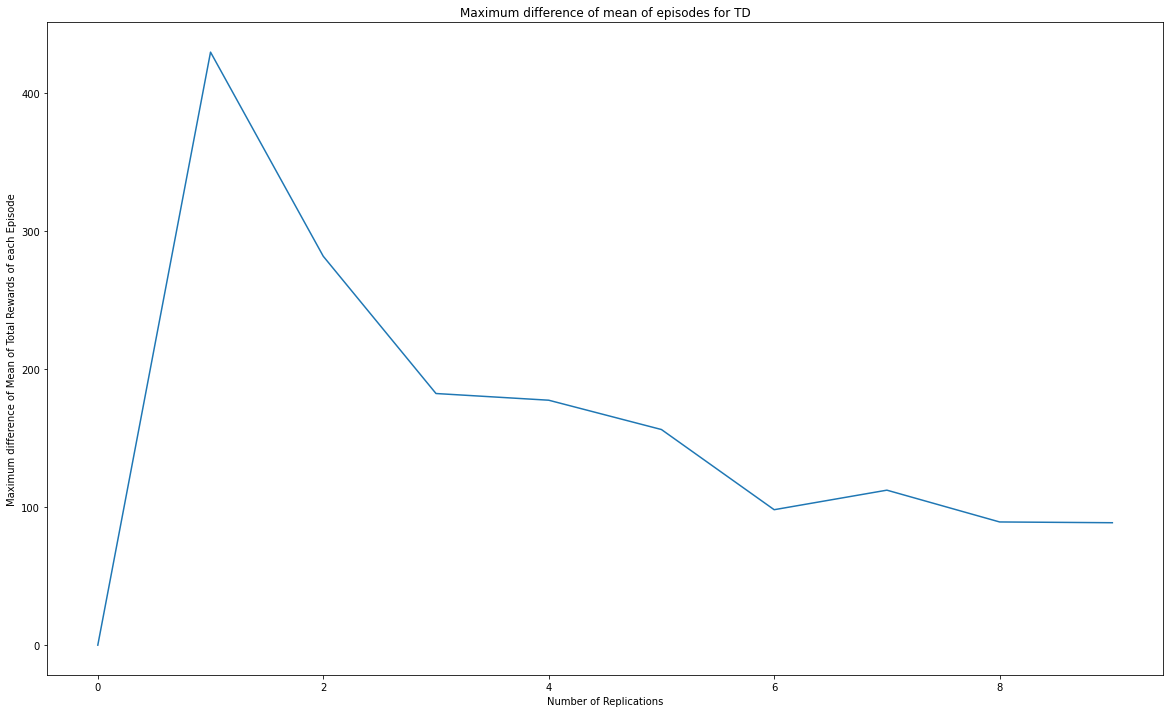

IndexError: ignored

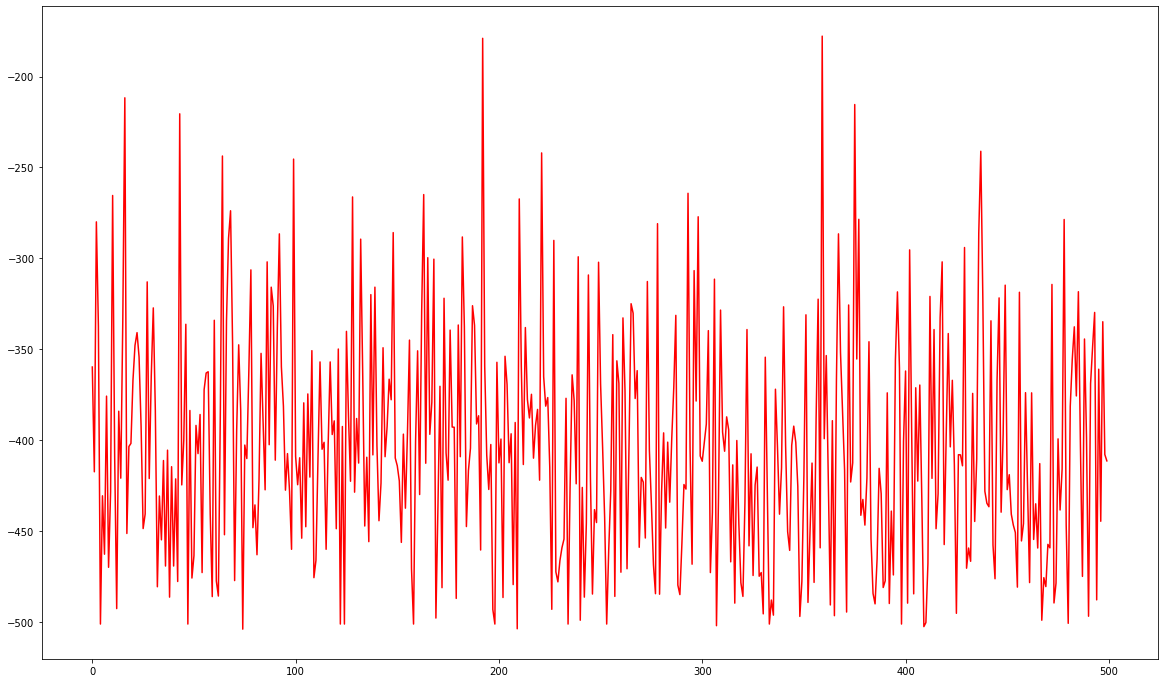

In [209]:
# Q3.4: Learning Curve of TD


# To determine a sufficient replication number  
plt.figure(figsize=(20,12))
# max_diff = np.max(difference[1][:])
plt.plot(difference)
plt.title('Maximum difference of mean of episodes for TD')
plt.xlabel('Number of Replications')
plt.ylabel('Maximum difference of Mean of Total Rewards of each Episode')
plt.show()

# Learning Curve for MC
plt.figure(figsize=(20,12))
plt.plot(mean_rewards[9], color='red')
plt.fill(std_rewards[10][:],color='yellow')
plt.title('Learning Curve for TD algorithm')
plt.xlabel('Number of Replications')
plt.ylabel('Maximum difference of Mean of Total Rewards of each Episode')
plt.legend('Mean','Standard Deviation')
plt.show()

NameError: ignored